## IMPORTING LIBRARIES

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## LOADING THE DATASET

In [2]:
dataset = pd.read_excel('New_sub_val_test.xlsx')
dataset.head()

,log(surf T),1/Esat surf,qair-qsurf,sub values
0,5.611032,0.001636,-0.000008,-0.000025
1,5.611032,0.001636,-0.000098,-0.000221
2,5.611032,0.001636,-0.000131,-0.000306
3,5.611032,0.001636,-0.000135,-0.000427
4,5.611032,0.001636,-0.000084,-0.000200


## DEFINING THE X-AXIS & Y-AXIS

In [3]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, 3]
x

,log(surf T),1/Esat surf,qair-qsurf
0,5.611032,0.001636,-0.000008
1,5.611032,0.001636,-0.000098
2,5.611032,0.001636,-0.000131
3,5.611032,0.001636,-0.000135
4,5.611032,0.001636,-0.000084
5,5.611032,0.001636,-0.000055
6,5.611032,0.001636,-0.000033
7,5.611032,0.001636,0.000147
8,5.611015,0.001637,0.000154
9,5.610136,0.001666,0.000059


## TRAINING THE DATASET

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## 1) MULTIPLE LINEAR REGRESSION

In [5]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [6]:
# Predicting the Test set results

y_pred = regressor.predict(x_test)

In [7]:
# Obtaining accuracy

multivariate_score=r2_score(y_test,y_pred)
multivariate_score

0.7623975680743708

In [8]:
#finding intercept

intercept=regressor.intercept_
intercept

2.649162833308554

In [9]:
#finding coefficients

coefficients=regressor.coef_
coefficients

array([ -0.46806849, -14.00517366,   1.14973782])

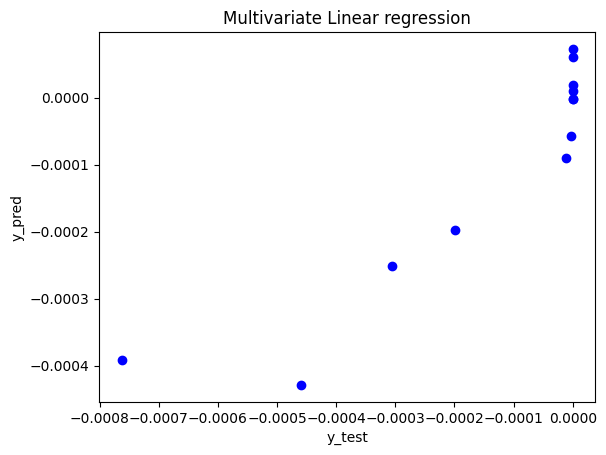

In [10]:
# plotting the points   
plt.plot(y_test,y_pred,"ob")  
    
# naming the x axis  
plt.xlabel('y_test')  
# naming the y axis  
plt.ylabel('y_pred')  
    
# giving a title to my graph  
plt.title('Multivariate Linear regression')  
    
# function to show the plot  
plt.show()  

## 2) POLYNOMIAL REGRESSION

In [23]:
# Assuming 'dataset' is your dataframe containing features and target variable
p = dataset.iloc[:, :-1]
q = dataset.iloc[:, -1]  # Assuming the target variable is in the last column

# Split the data
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.2, random_state=42)

# Polynomial regression
poly = PolynomialFeatures(degree=2)
regressor = LinearRegression()

# Transform features
p_poly_train = poly.fit_transform(p_train)
p_poly_test = poly.transform(p_test)

# Fit the model
regressor.fit(p_poly_train, q_train)

# Make predictions
q_pred = regressor.predict(p_poly_test)

# Evaluate R^2
polynomial_score = r2_score(q_test, q_pred)
print("Polynomial Regression R^2:", polynomial_score)

mse = mean_squared_error(q_test, q_pred)
print("mse",mse)

# Check coefficients
coefficients = regressor.coef_
print("Coefficients:", coefficients)

# # Get the DataFrame with transformed features and column names
# poly_train_df = pd.DataFrame(p_poly_train, columns=[f'x{i}' for i in range(p_poly_train.shape[1])])

# # Print the DataFrame to see the transformed features
# print(poly_train_df)

Polynomial Regression R^2: 0.6367627486664135
mse 9.01658911574735e-09
Coefficients: [ 0.00000000e+00  4.70116592e+07 -2.97179779e+09  1.57288676e+05
 -4.09924796e+06  5.38972600e+08 -2.78011084e+04  1.78868058e+09
 -7.91125556e+05 -7.89519885e+03]


## Polynomial_regression_using other degrees

In [24]:
# Assuming 'dataset' is your dataframe containing features and target variable
p = dataset.iloc[:, :-1]
q = dataset.iloc[:, -1]  # Assuming the target variable is in the last column

# Split the data
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.2, random_state=42)

# Polynomial regression
poly = PolynomialFeatures(degree=3)
regressor = LinearRegression()

# Transform features
p_poly_train = poly.fit_transform(p_train)
p_poly_test = poly.transform(p_test)

# Fit the model
regressor.fit(p_poly_train, q_train)

# Make predictions
q_pred = regressor.predict(p_poly_test)

# Evaluate R^2
polynomial_score = r2_score(q_test, q_pred)
print("Polynomial Regression R^2:", polynomial_score)

mse = mean_squared_error(q_test, q_pred)
print("mse",mse)

# Check coefficients
coefficients = regressor.coef_
print("Coefficients:", coefficients)

Polynomial Regression R^2: 0.8212432384383868
mse 4.437254892622445e-09
Coefficients: [ 0.00000000e+00 -2.30555436e+06  5.80336522e+07 -7.83146680e+07
 -9.24593900e+05  1.51354440e+08  2.77524861e+07 -2.08296973e+07
  1.13516344e+08 -2.17083483e+09  1.30846522e+05 -2.93577372e+07
 -2.45877835e+06 -1.00944812e+08 -1.96351804e+07  3.83687112e+08
 -6.52618527e+06  1.87652004e+08  1.09669393e+10  2.25676312e+07]


## Without scaling the data

In [28]:
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size = 0.2, random_state =42)

In [29]:
poly = PolynomialFeatures(degree=2)
regre= LinearRegression()
p_poly_train = poly.fit_transform(p_train)
p_test_poly = poly.transform(p_test)
poly.fit(p_poly_train, q_train)
regre.fit(p_poly_train, q_train)

LinearRegression()

In [30]:
q_pred=regre.predict(p_test_poly)

In [31]:
polynomial_score=r2_score(q_test,q_pred)
polynomial_score

0.6367627486664135

In [32]:
regre.coef_

array([ 0.00000000e+00,  4.70116592e+07, -2.97179779e+09,  1.57288676e+05,
       -4.09924796e+06,  5.38972600e+08, -2.78011084e+04,  1.78868058e+09,
       -7.91125556e+05, -7.89519885e+03])

## scaling the data


In [33]:
scaler = StandardScaler()
p_train_scaler = scaler.fit_transform(p_train)
p_test_scaler = scaler.transform(p_test)

In [34]:
poly = PolynomialFeatures(degree=2)
p_poly_train = poly.fit_transform(p_train_scaler)
p_test_poly = poly.transform(p_test_scaler)
poly.fit(p_poly_train, q_train)
regressor.fit(p_poly_train, q_train)

LinearRegression()

In [35]:
q_pred = regressor.predict(p_test_poly)

In [36]:
polynomial_score=r2_score(q_test,q_pred)

In [37]:
polynomial_score

0.6368960074297692

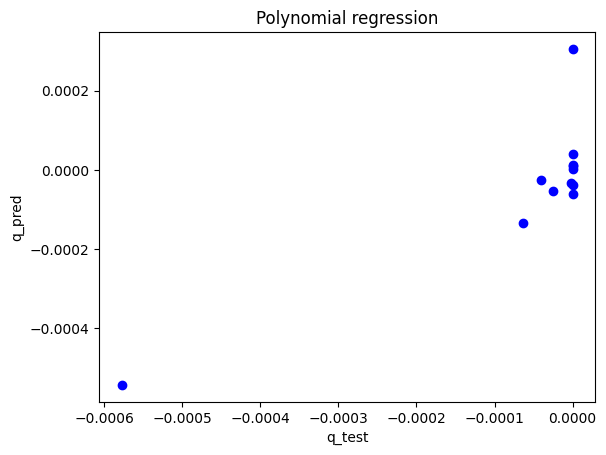

In [38]:
# plotting the points   
plt.plot(q_test,q_pred,"ob")  
    
# naming the x axis  
plt.xlabel('q_test')  
# naming the y axis  
plt.ylabel('q_pred')  
    
# giving a title to my graph  
plt.title('Polynomial regression')  
    
# function to show the plot  
plt.show() 

## 3) RANDOM FOREST REGRESSION

In [39]:
a = dataset.iloc[:, :-1]
b = dataset.iloc[:, 3]

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2, random_state = 42)

In [40]:
reg = RandomForestRegressor()
reg.fit(a_train, b_train)

RandomForestRegressor()

In [41]:
b_pred_new = reg.predict(a_test)
Random_forest_score=r2_score(b_test,b_pred_new)
Random_forest_score

0.927328732352513

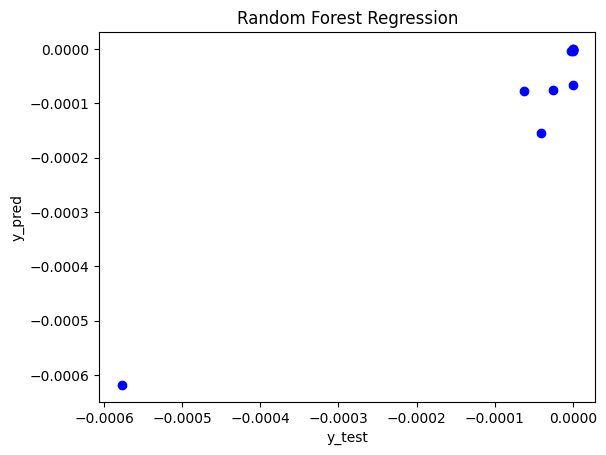

In [42]:
# plotting the points   
plt.plot(b_test,b_pred_new,"ob")  
    
# naming the x axis  
plt.xlabel('y_test')  
# naming the y axis  
plt.ylabel('y_pred')  
    
# giving a title to my graph  
plt.title('Random Forest Regression')  
    
# function to show the plot  
plt.show() 

## 4) SUPPORT VECTOR REGRESSION

Mean Squared Error: 1.291452556089583e-07
R^2 Score: -4.202673324466249
Dual Coefficients: []
Support Vectors: []


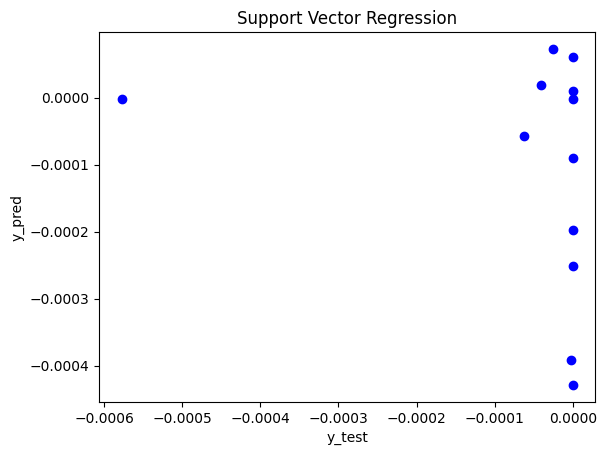

In [45]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming your data is in X and labels in y
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 3]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (SVR is sensitive to the scale of features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR model
svr = SVR(kernel='rbf')  # You can use other kernels like 'rbf' as well

# Fit the model to the training data
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
# After fitting the SVR model
dual_coefficients = svr.dual_coef_

print("Dual Coefficients:", dual_coefficients)
support_vectors = svr.support_vectors_

print("Support Vectors:", support_vectors)
# plotting the points   
plt.plot(y_test,y_pred,"ob")  
    
# naming the x axis  
plt.xlabel('y_test')  
# naming the y axis  
plt.ylabel('y_pred')  
    
# giving a title to my graph  
plt.title('Support Vector Regression')  
    
# function to show the plot  
plt.show() 

## 5) DECISION TREE REGRESSION

In [46]:
# Assuming your data is in X and labels in y
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, 3]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rg = DecisionTreeRegressor() 
rg.fit(x_train, y_train)

DecisionTreeRegressor()

In [47]:
y_predict = rg.predict(x_test)

In [48]:
decision_tree_score=r2_score(y_test,y_predict)
decision_tree_score

0.6962527639551213

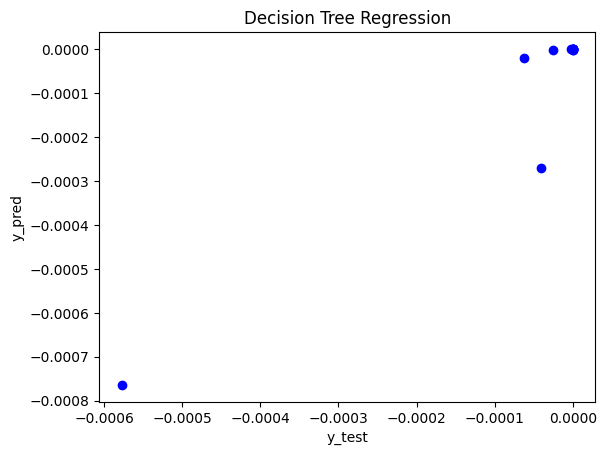

In [49]:
# plotting the points   
plt.plot(y_test,y_predict,"ob")  
    
# naming the x axis  
plt.xlabel('y_test')  
# naming the y axis  
plt.ylabel('y_pred')  
    
# giving a title to my graph  
plt.title('Decision Tree Regression')  
    
# function to show the plot  
plt.show()

## Best Fitting Model

In [50]:
# Create and fit the random forest model
model = RandomForestRegressor(n_estimators=100)  # You can adjust the number of trees
model.fit(a,b)  # X represents your independent variables, and y is the dependent variable

# Get feature importances
feature_importances = model.feature_importances_

# Print the feature importances
for i, feature in enumerate(a.columns):
    print(f"Feature: {feature}, Importance: {feature_importances[i]}")


Feature: log(surf T), Importance: 0.059835116733295286
Feature: 1/Esat surf, Importance: 0.039400079661017315
Feature: qair-qsurf, Importance: 0.9007648036056874


In [52]:
b_pred_new = model.predict(a_test)

r2 = r2_score(b_test, b_pred_new)
mse = mean_squared_error(b_test, b_pred_new)
mae = mean_absolute_error(b_test, b_pred_new)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.993910712630324
Mean Squared Error: 1.5115355602571557e-10
Mean Absolute Error: 6.664178950000046e-06
